## Development DF comparison with the rest of the Kickstarter data set

We want to make sure that development sample of data retains characteristics of the base data set.

Description of both data sets shows close similarity in terms of mean values, standard deviation. 

Very heavy outliers in terms of super-successful campaigns however render it impossible to prepare development sample that covers them fully (see the pledged plot at the end) 

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rest_df = pd.read_csv('rest_df.csv')
dev_df = pd.read_csv('dev_df.csv')

In [3]:
rest_df.head()

,main_cat_cat,country,duration,currency,goal_in_usd,percentage_of_money_collected,backers,state,pledged_in_usd
0,50,21,30,13,25000.00,0.000000,0,0,0.00
1,138,21,30,13,13000.00,0.174615,40,0,2270.00
2,50,7,30,5,20804.67,0.002390,1,0,49.73
3,115,21,24,13,600.00,0.000000,0,0,0.00
4,64,21,30,13,10000.00,0.005100,2,0,51.00


In [4]:
dev_df.head()

,main_cat_cat,country,duration,currency,goal_in_usd,percentage_of_money_collected,backers,state,pledged_in_usd
0,80,21,30,13,500.00,1.150000,15,1,575.00
1,54,7,30,5,3315.48,0.009999,1,0,33.15
2,0,21,31,13,18000.00,1.160611,181,1,20891.00
3,154,21,45,13,60000.00,0.000000,0,0,0.00
4,159,21,45,13,75000.00,0.156453,100,0,11734.01


## df.describe

In [5]:
rest_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,main_cat_cat,country,duration,currency,goal_in_usd,percentage_of_money_collected,backers,state,pledged_in_usd
count,331414,331414,331414,331414,331414,331414,331414,331414,331414
mean,85.3333,17.9269,34.1812,11.0261,45035.5,3.38915,107.497,0.361098,9153.98
std,45.7419,6.22598,12.7918,3.92691,1.12815e+06,283.165,941.016,0.48032,93340.6
min,0,0,1,0,0.01,0,0,0,0
25%,50,21,30,13,2000,0.00476477,2,0,32
50%,84,21,30,13,5500,0.136,12,0,631
75%,120,21,37,13,16000,1.06667,57,1,4075
max,169,21,92,13,1.66361e+08,104278,219382,1,2.0339e+07


In [6]:
dev_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,main_cat_cat,country,duration,currency,goal_in_usd,percentage_of_money_collected,backers,state,pledged_in_usd
count,36824,36824,36824,36824,36824,36824,36824,36824,36824
mean,85.1896,17.959,34.0792,11.0524,46872.9,2.37795,103.952,0.362481,9203.46
std,45.6717,6.2073,12.7356,3.90838,1.16228e+06,101.813,666.031,0.480723,76577.2
min,0,0,1,0,0.72,0,0,0,0
25%,50,21,30,13,2000,0.0048083,2,0,35
50%,84,21,30,13,5500,0.138301,12,0,633.015
75%,120,21,36,13,15951.7,1.06495,57,1,4113.17
max,169,21,92,13,1.04057e+08,12984,67226,1,9.19206e+06


In [7]:
%matplotlib inline

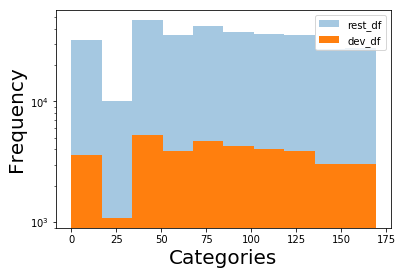

In [8]:
plt.clf()
plt.hist(rest_df['main_cat_cat'], alpha=0.4, label='rest_df', log=True)
plt.hist(dev_df['main_cat_cat'], alpha=1, label='dev_df', log=True)
plt.legend(loc='upper right')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Categories',fontsize=20)
plt.show()

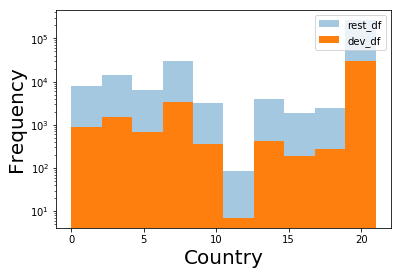

In [9]:
plt.clf()
plt.hist(rest_df['country'], alpha=0.4, label='rest_df', log=True)
plt.hist(dev_df['country'], alpha=1, label='dev_df', log=True)
plt.legend(loc='upper right')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.show()

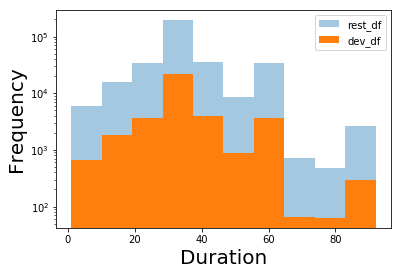

In [10]:
plt.clf()
plt.hist(rest_df['duration'], alpha=0.4, label='rest_df', log=True)
plt.hist(dev_df['duration'], alpha=1, label='dev_df', log=True)
plt.legend(loc='upper right')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Duration',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

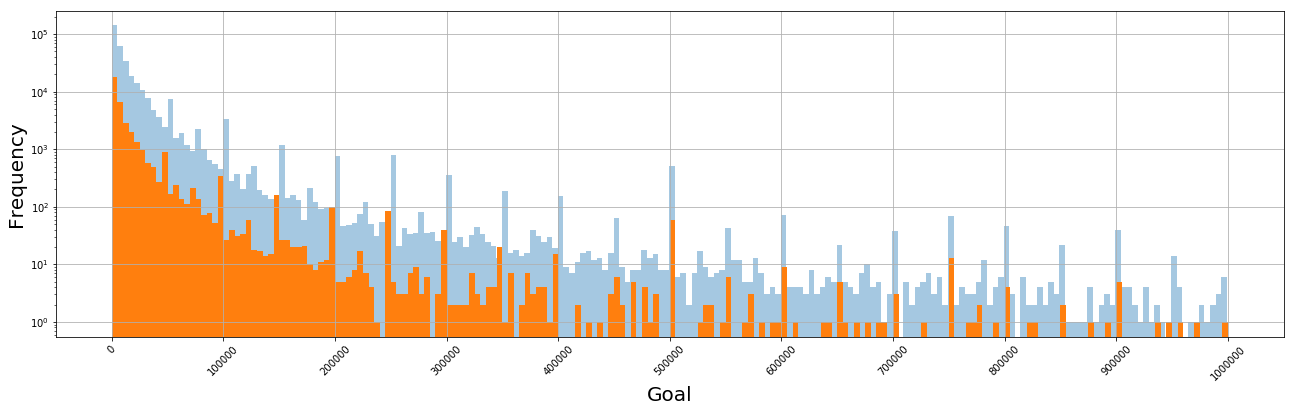

In [11]:
plt.clf()
plt.figure(figsize=(22, 6))
my_hist=rest_df['goal_in_usd'][(rest_df['goal_in_usd'])<1000000].hist(bins=200, alpha=0.4)
my_hist.set_yscale('log')
my_hist2=dev_df['goal_in_usd'][(dev_df['goal_in_usd'])<1000000].hist(bins=200)
my_hist2.set_yscale('log')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Goal',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks([0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],
           fontsize=10,rotation=45 )
plt.show()

<Figure size 432x288 with 0 Axes>

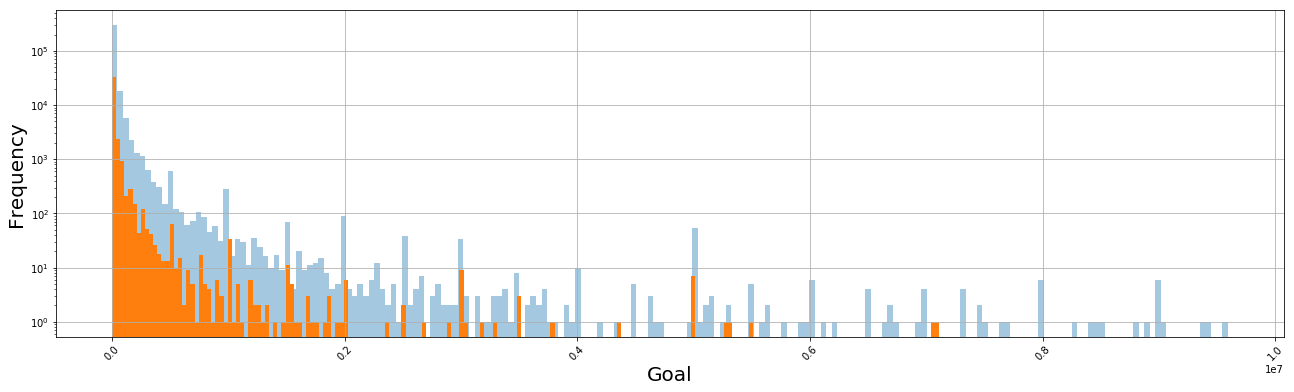

In [12]:
plt.clf()
plt.figure(figsize=(22, 6))
my_hist=rest_df['goal_in_usd'][(rest_df['goal_in_usd'])<10000000].hist(bins=200, alpha=0.4)
my_hist.set_yscale('log')
my_hist2=dev_df['goal_in_usd'][(dev_df['goal_in_usd'])<10000000].hist(bins=200)
my_hist2.set_yscale('log')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Goal',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=45 )
plt.show()

<Figure size 432x288 with 0 Axes>

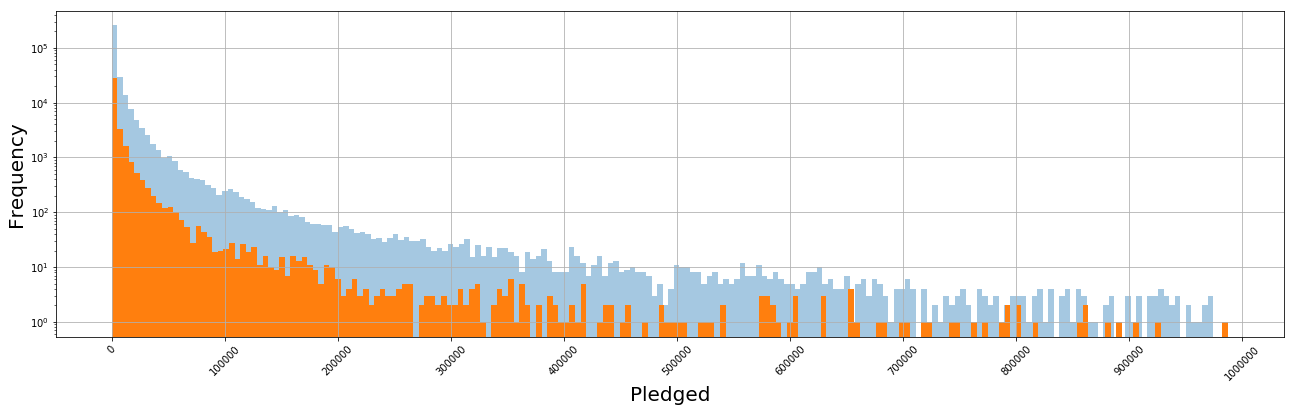

In [13]:
plt.clf()
plt.figure(figsize=(22, 6))
my_hist=rest_df['pledged_in_usd'][(rest_df['pledged_in_usd'])<1000000].hist(bins=200, alpha=0.4)
my_hist.set_yscale('log')
my_hist2=dev_df['pledged_in_usd'][(dev_df['pledged_in_usd'])<1000000].hist(bins=200)
my_hist2.set_yscale('log')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Pledged',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks([0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],
           fontsize=10,rotation=45 )
plt.show()

<Figure size 432x288 with 0 Axes>

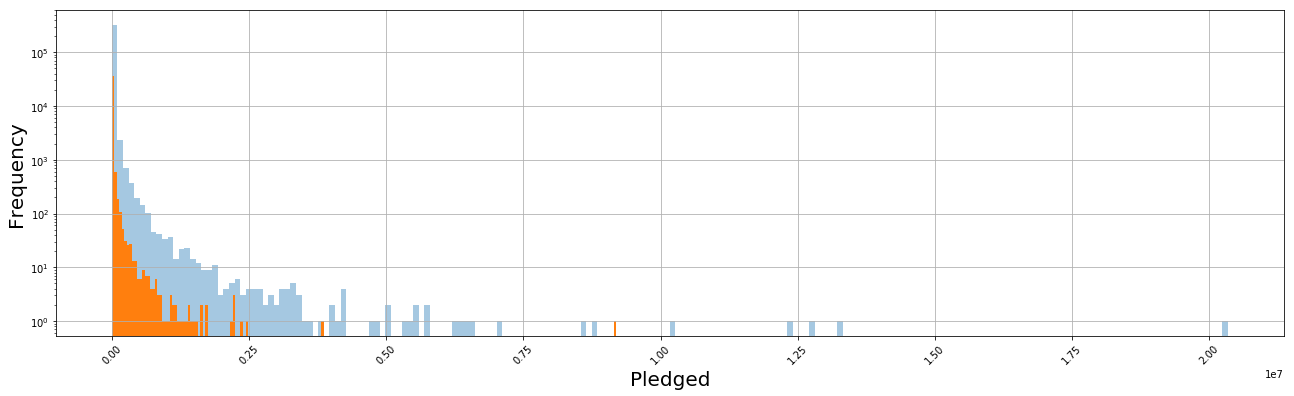

In [14]:
plt.clf()
plt.figure(figsize=(22, 6))
my_hist=rest_df['pledged_in_usd'][(rest_df['goal_in_usd'])<10000000].hist(bins=200, alpha=0.4)
my_hist.set_yscale('log')
my_hist2=dev_df['pledged_in_usd'][(dev_df['goal_in_usd'])<10000000].hist(bins=200)
my_hist2.set_yscale('log')
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Pledged',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=45 )
plt.show()